In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.read_csv('twitter_human_bots_dataset.csv')
df = data
df.columns

Index(['Unnamed: 0', 'created_at', 'default_profile', 'default_profile_image',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'geo_enabled', 'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'account_type'],
      dtype='object')

In [54]:
df.duplicated().sum()

0

In [55]:
df.isnull().sum()

Unnamed: 0                         0
created_at                         0
default_profile                    0
default_profile_image              0
description                     7257
favourites_count                   0
followers_count                    0
friends_count                      0
geo_enabled                        0
id                                 0
lang                            7957
location                           4
profile_background_image_url    4499
profile_image_url                  1
screen_name                        0
statuses_count                     0
verified                           0
average_tweets_per_day             0
account_age_days                   0
account_type                       0
dtype: int64

In [56]:
df[df['location'].isnull()]

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
4393,4393,2010-01-20 14:07:51,True,False,NaN,1312,34,95,False,106723717,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8225219356...,warboytommo,2282,False,0.591,3863,human
10148,10148,2009-01-29 20:37:30,False,False,🇫🇷,1235,14,138,False,19732597,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1093600295...,Kondratowitch,2567,False,0.608,4219,human
19669,19669,2011-08-01 07:35:56,True,False,We are retiring I'amSoftware as we will stop d...,65,23,0,False,346429898,en,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1770601770...,iamsoftware_inc,803,False,0.243,3306,bot
30520,30520,2009-03-06 02:50:58,False,False,dwayne the rock johnson fan account,86090,4077366,451,True,23019705,en,NaN,http://abs.twimg.com/images/themes/theme10/bg.gif,http://pbs.twimg.com/profile_images/1200504272...,DebbyRyan,24337,True,5.817,4184,human


In [57]:
df[df['profile_image_url'].isnull()]

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
2270,2270,2011-03-26 11:56:05,False,False,@fuzeyuji's account is temporarily unavailable...,81723,1799,519,False,272383381,en,unknown,http://abs.twimg.com/images/themes/theme12/bg.gif,NaN,fuzeyuji,145899,False,42.499,3433,bot


In [58]:
# possible feature engineering - create is_missing col for columns with missing data
missing_cols = ['description', 'lang', 'profile_background_image_url']

for c in missing_cols:
    df[f'is_missing_{c}'] = df[c].isnull()

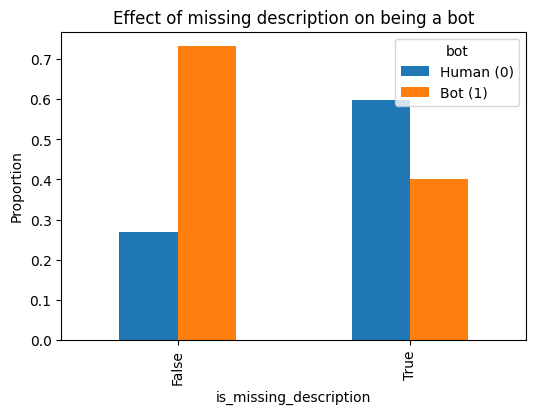

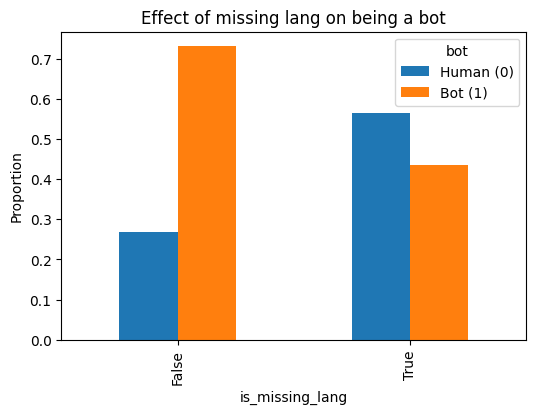

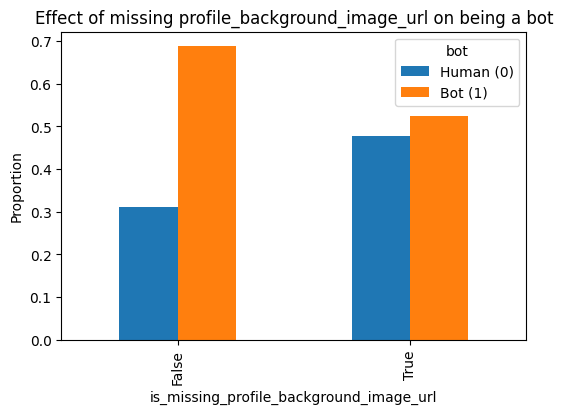

In [62]:
import matplotlib.pyplot as plt

missing_cols = ['description', 'lang', 'profile_background_image_url']

for c in missing_cols:
    col = f'is_missing_{c}'
    counts = df.groupby(col)['account_type'].value_counts(normalize=True).unstack()
    counts.plot(kind='bar', figsize=(6, 4))
    plt.title(f'Effect of missing {c} on being a bot')
    plt.xlabel(f'{col}')
    plt.ylabel('Proportion')
    plt.legend(title='bot', labels=['Human (0)', 'Bot (1)'])
    plt.show()


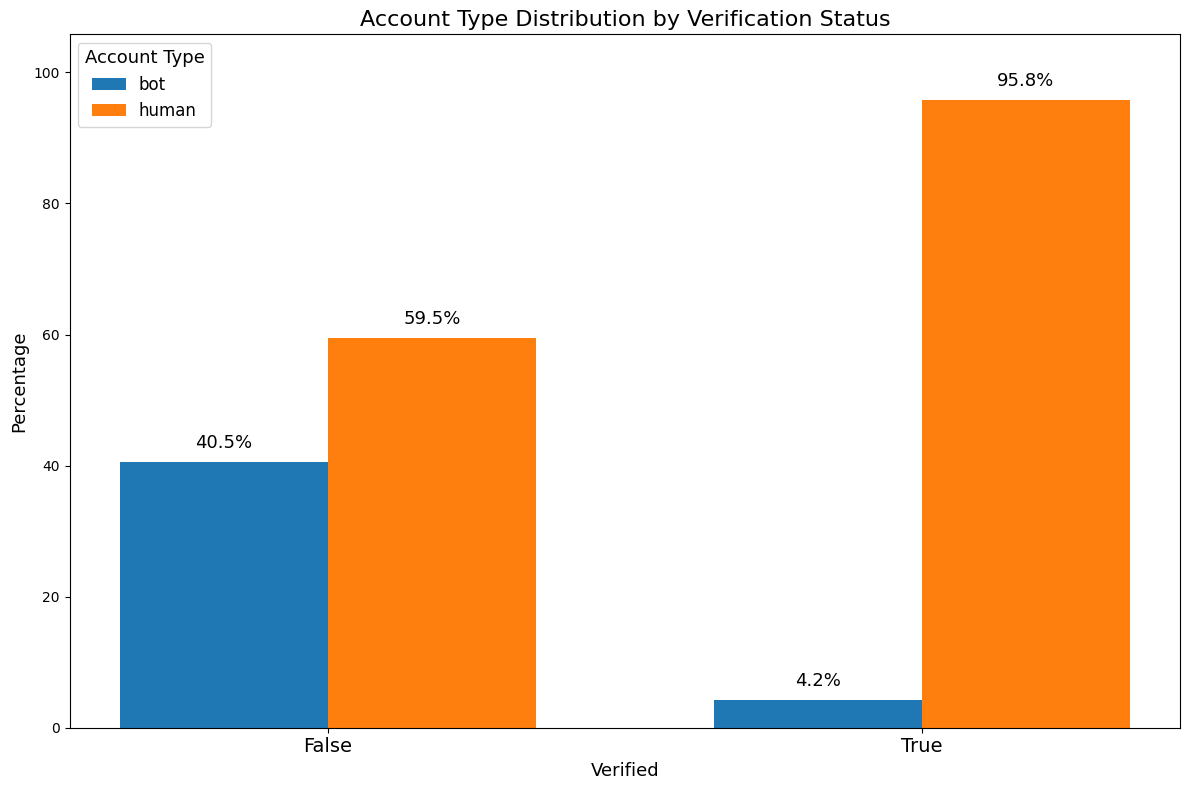

In [ ]:
# Calculate counts & percentages within each verification status
counts = df.groupby(['verified', 'account_type']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12,8))  

# Plot side-by-side bars
labels = percentages.index.astype(str) 
account_types = percentages.columns
x = np.arange(len(labels))  # positions for groups
width = 0.35  # width of each bar

for i, acct_type in enumerate(account_types):
    ax.bar(x + i*width, percentages[acct_type], width, label=acct_type)

# Add percentage labels above bars
for i, acct_type in enumerate(account_types):
    for j, val in enumerate(percentages[acct_type]):
        ax.text(j + i*width, val + 1.5, f'{val:.1f}%', ha='center', va='bottom', fontsize=13)

# 
ax.set_xticks(x + width/2)
ax.set_xticklabels(labels, fontsize=14)
ax.set_ylabel('Percentage', fontsize=13)
ax.set_xlabel('Verified', fontsize=13)
ax.set_title('Account Type Distribution by Verification Status', fontsize=16)
ax.legend(title='Account Type', fontsize=12, title_fontsize=13)
plt.ylim(0, percentages.values.max() + 10) 
plt.tight_layout()
plt.show()